In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
from lib.SamplingOptimizer import SamplingOptimizer
from lib.RangeOptimizer import RangeOptimizer
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared
from matplotlib import pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
np.set_printoptions(precision = 2)
pd.options.display.float_format = '{:,.2f}'.format

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# x1 ∈ [-5, 10], x2 ∈ [0, 15]
def brannin_hoo(x, e_std=0.01):
    a = 1
    b = 5.1 / (4 * np.pi ** 2)
    c = 5 / np.pi
    r = 6
    s = 10
    t = 1 / (8 * np.pi)
    e = np.random.normal(0, e_std)
        
    return (x[1] - b * x[0] ** 2 + c * x[0] - r) ** 2 + s * (1 - t) * np.cos(x[0]) + s + e

brannin_hoo(np.array([9.424,2.475]), e_std=0.1)

0.40231187876640778

Best achieved in this run: 2.3780292360616397
Best achieved in this run: 2.0390328073253765
Best achieved in this run: 0.9833294557531567
Best achieved in this run: 1.1081614106284752
Best achieved in this run: 1.6587576793779961
Best achieved in this run: 2.483800453120851
Best achieved in this run: 2.0958265068511674
Best achieved in this run: 1.8484257254752257
Best achieved in this run: 0.40236375270266866
Best achieved in this run: 2.026848991269312
Best achieved in this run: 2.6683545921394063
Best achieved in this run: 0.6904740569109922
Best achieved in this run: 1.0652115555351114
Best achieved in this run: 0.6167598277758366
Best achieved in this run: 0.45310538284738855
Best achieved in this run: 1.023008624530128
Best achieved in this run: 0.8026558076572168
Best achieved in this run: 1.4462358056450646
Best achieved in this run: 6.724397472620489
Best achieved in this run: 1.6313997239111628
Best achieved in this run: 0.4736079761362383
Best achieved in this run: 0.8536976

/usr/local/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Best achieved in this run: 1.755783207832645
Best achieved in this run: 3.493600176748371
Best achieved in this run: 1.0162625327977846
Best achieved in this run: 0.682978539680799
Best achieved in this run: 1.2040296206081014
Best achieved in this run: 3.774779501748836
Best achieved in this run: 1.706353273829461


/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


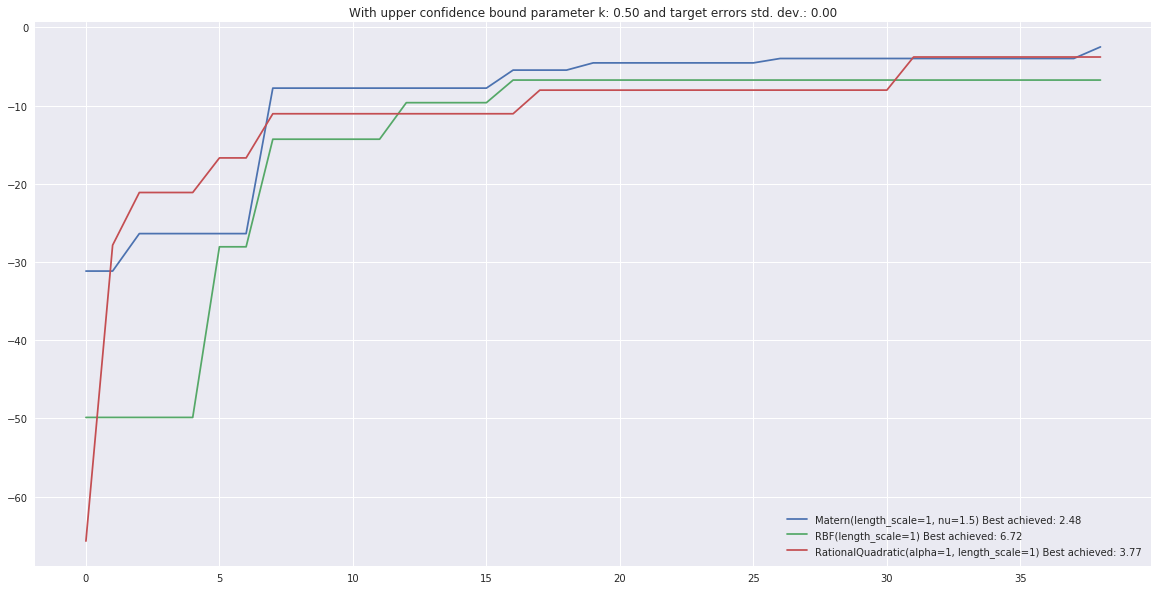

Best achieved in this run: 2.3354935647414465
Best achieved in this run: 0.9093694106495268
Best achieved in this run: 0.9780829778964275
Best achieved in this run: 0.9637187777394604
Best achieved in this run: 0.9708670040908589
Best achieved in this run: 1.164567432470673
Best achieved in this run: 0.3536131184826704
Best achieved in this run: 2.174908954530404
Best achieved in this run: 2.1066179128864153
Best achieved in this run: 0.5427855279270875
Best achieved in this run: 0.74156552237238
Best achieved in this run: 0.6895506219489295
Best achieved in this run: 1.1088206590144718
Best achieved in this run: 3.240013550443777
Best achieved in this run: 0.5530439669937527
Best achieved in this run: 0.9700730995025197
Best achieved in this run: 1.776135620290254
Best achieved in this run: 0.5535278669469467
Best achieved in this run: 0.6428125984720863
Best achieved in this run: 1.4091532639449913
Best achieved in this run: 7.9752620840607715
Best achieved in this run: 1.02405277822

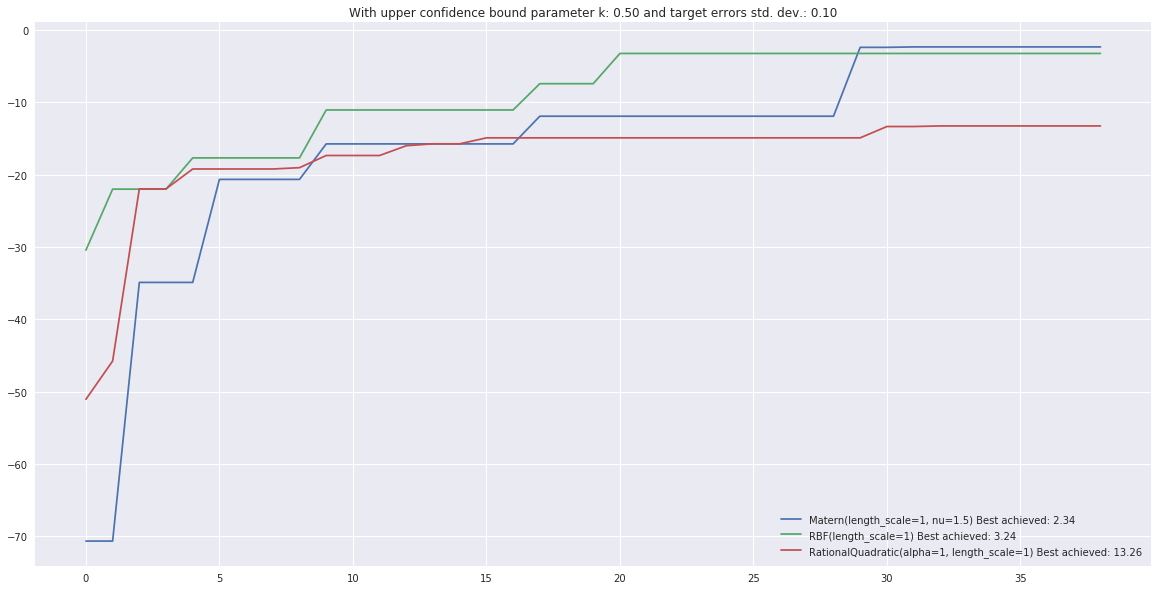

Best achieved in this run: 1.160442944789658
Best achieved in this run: 0.6357667537701039
Best achieved in this run: 3.5154623605647757
Best achieved in this run: 1.4054054369818414
Best achieved in this run: 1.5896611464517976
Best achieved in this run: 2.7628839523693514
Best achieved in this run: 1.784018710292859
Best achieved in this run: 0.4998249709959032
Best achieved in this run: 1.9459850042973919
Best achieved in this run: 1.6869941222872424
Best achieved in this run: 0.7272465683296765
Best achieved in this run: 1.2559738887594578
Best achieved in this run: 1.0119879268887917
Best achieved in this run: 3.8391571635855506
Best achieved in this run: 2.887725765348724
Best achieved in this run: 0.7943337270330327
Best achieved in this run: 0.8010378977236281
Best achieved in this run: 3.1316772330815685
Best achieved in this run: 0.49670453374826357
Best achieved in this run: 0.49309870460089295
Best achieved in this run: 2.1698876656295814
Best achieved in this run: 6.286556

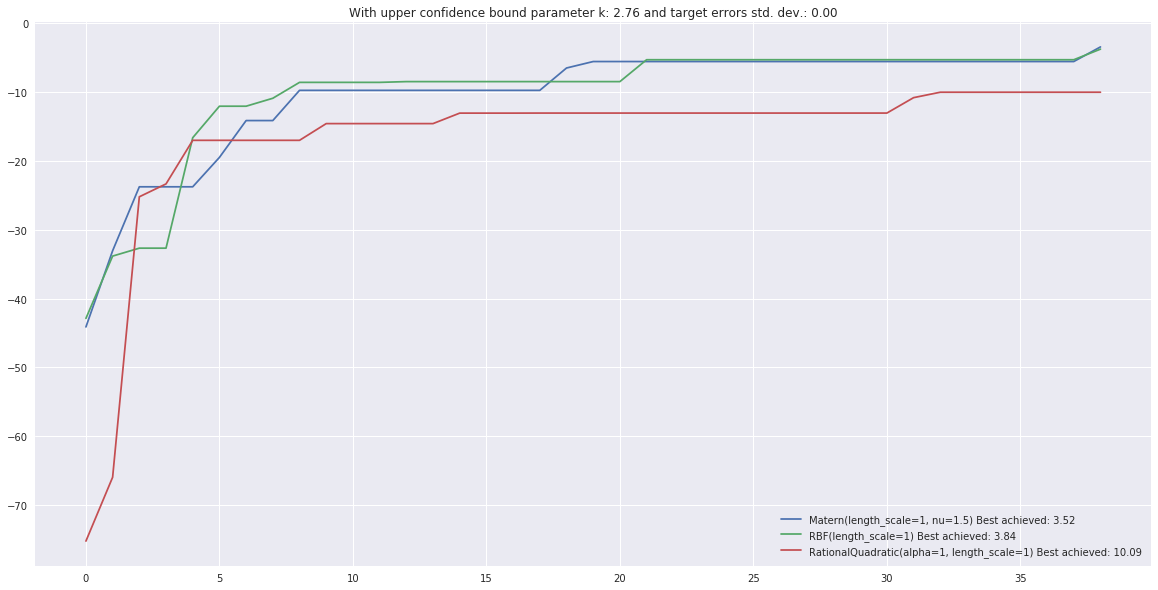

Best achieved in this run: 3.857077601472242
Best achieved in this run: 0.6155307808465036
Best achieved in this run: 1.8083288500710342
Best achieved in this run: 0.8556885176762494
Best achieved in this run: 0.5844934302308479
Best achieved in this run: 1.7193176446583003
Best achieved in this run: 0.8580359717277887
Best achieved in this run: 1.8300165913585902
Best achieved in this run: 1.7359149794255926
Best achieved in this run: 1.5987005945404194
Best achieved in this run: 0.6436431762205078
Best achieved in this run: 0.8727341241707215
Best achieved in this run: 1.8109850428724483
Best achieved in this run: 0.8026941555626989
Best achieved in this run: 1.155979356122346
Best achieved in this run: 1.2887189944580473
Best achieved in this run: 0.5503191317720987
Best achieved in this run: 1.2731149866465048
Best achieved in this run: 0.44474753300065517
Best achieved in this run: 0.5858481401414868
Best achieved in this run: 0.5224983508025031
Best achieved in this run: 1.531340

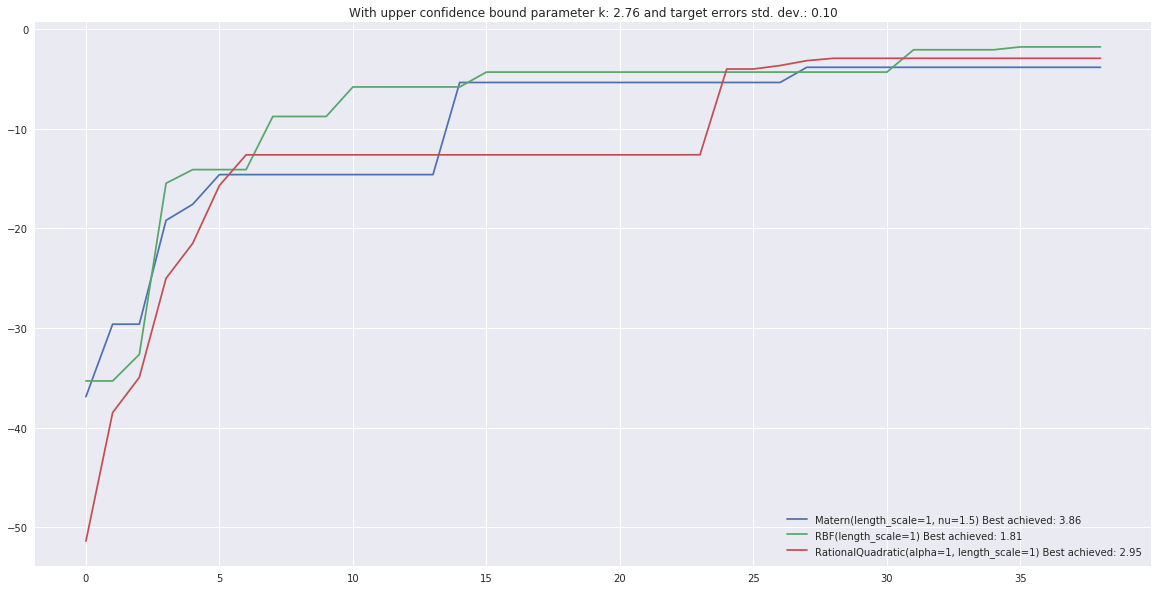

In [9]:
for k in [.5, 2.756]:
    for e in [.0011, .1]:
        results = []
        for i, kernel in enumerate([Matern(), RBF(), RationalQuadratic()]):
            all_scores = []
            for r in range(10):
                ro = RangeOptimizer({
                    'x1': (-5., 10.),
                    'x2': (0., 15.)
                }, kernel=kernel, init_observations=[
                    [1, 2, brannin_hoo(np.array([1, 2]), e_std=0.1)],
                    [1, 2, brannin_hoo(np.array([0, 0]), e_std=0.1)]
                ], acquisition_params={
                    'k': k,
                    'type': 'upper_confidence_bound'
                })
                for t in range(40):
                    x = ro.suggest(return_dict=True)
                    y = - brannin_hoo([x['x1'], x['x2']], e_std=e) # negative to turn mimization into maximization
                    ro.update([x[fn] for fn in ro.feature_names], y)
                    
                print('Best achieved in this run: {}'.format(-ro.best_achieved[-1]))
                all_scores.append(ro.best_achieved)
                
            avg_scores = np.stack(all_scores, axis=1).min(axis=1)
            results.append((avg_scores,str(kernel)))

        plt.figure(figsize=(20,10))
        for i, r in enumerate(results):
            plt.plot(r[0][1:], label='{} Minimum best achieved value: {:.2f}'.format(r[1], -np.max(r[0][1:])))

        plt.title('With upper confidence bound parameter k: {:.2f} and target errors std. dev.: {:.2f}'.format(k, e))
        plt.legend(loc=4)
        plt.show()

Best achieved in this run: 1.4304499841924152
Best achieved in this run: 1.5004200102625174
Best achieved in this run: 0.4787055070458946
Best achieved in this run: 2.0153237648032034
Best achieved in this run: 1.7630349968918357
Best achieved in this run: 0.8722075519532007
Best achieved in this run: 2.089828691262028
Best achieved in this run: 0.6955261563432402
Best achieved in this run: 0.9981599809822598
Best achieved in this run: 0.4674192388191465
Best achieved in this run: 1.3968102541614222
Best achieved in this run: 0.4435653904187326
Best achieved in this run: 0.8320831740149202
Best achieved in this run: 0.7962165769413885
Best achieved in this run: 1.2825467996685551
Best achieved in this run: 1.922424770538752
Best achieved in this run: 0.7726403783909307
Best achieved in this run: 0.8736706436963951
Best achieved in this run: 3.3189424142355337
Best achieved in this run: 1.88776138195997


/usr/local/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Best achieved in this run: 0.9038568775085193
Best achieved in this run: 0.7221295018802186
Best achieved in this run: 12.175304517311215
Best achieved in this run: 2.3831673756952405
Best achieved in this run: 2.810632794757078
Best achieved in this run: 0.4777591184408677
Best achieved in this run: 2.291232184304218
Best achieved in this run: 3.3618587571986276
Best achieved in this run: 2.1397194507040607
Best achieved in this run: 0.5381524100513992


/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


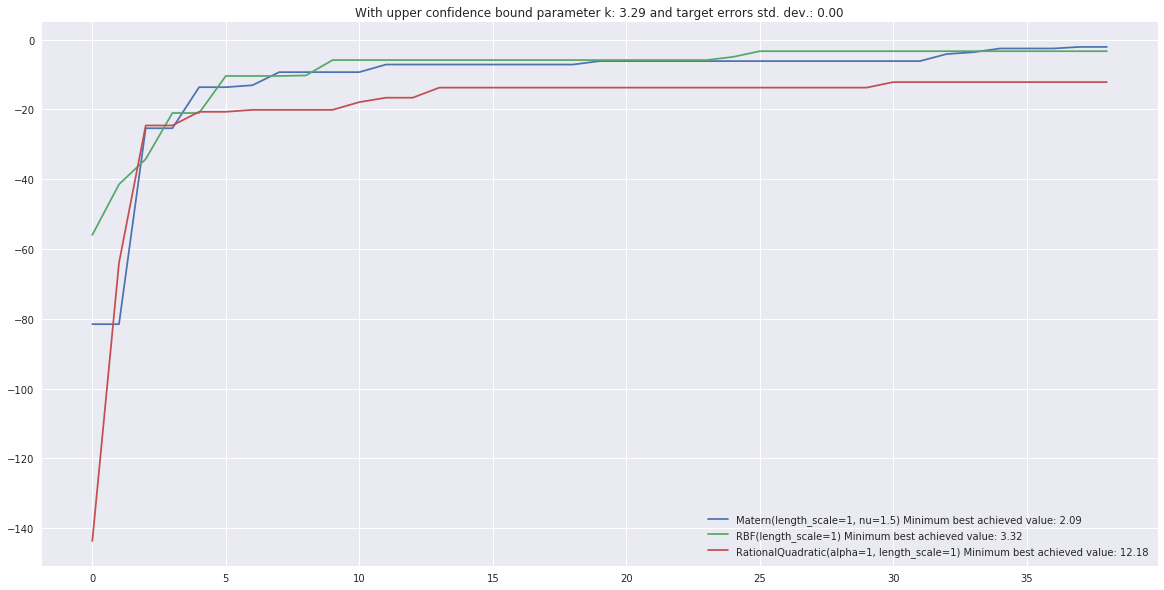

Best achieved in this run: 2.0490646479334047
Best achieved in this run: 5.504109273485512
Best achieved in this run: 2.4248669540419083
Best achieved in this run: 1.9831511805117232
Best achieved in this run: 0.9077867157725799
Best achieved in this run: 1.8178767289279605
Best achieved in this run: 1.2628825938709658
Best achieved in this run: 1.9740295336996299
Best achieved in this run: 2.4741087887498314
Best achieved in this run: 0.9157579025815872
Best achieved in this run: 0.5858592546978254
Best achieved in this run: 1.4479876490585428
Best achieved in this run: 0.28724853097529557
Best achieved in this run: 2.4929130341351335
Best achieved in this run: 1.3764915958251107
Best achieved in this run: 1.711598834920579
Best achieved in this run: 0.4663697551252949
Best achieved in this run: 0.650637944319029
Best achieved in this run: 0.9280625564020736
Best achieved in this run: 0.7383425076795912
Best achieved in this run: 0.8843838140081433
Best achieved in this run: 0.9624569

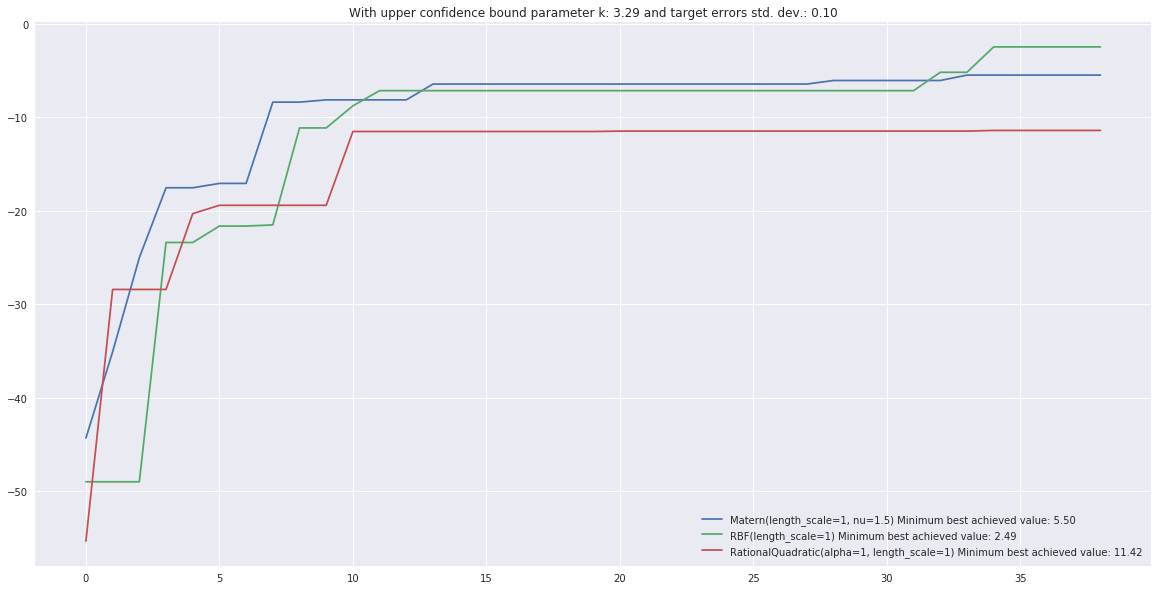

In [10]:
for k in [3.291]:
    for e in [.0001, .1]:
        results = []
        for i, kernel in enumerate([Matern(), RBF(), RationalQuadratic()]):
            all_scores = []
            for r in range(10):
                ro = RangeOptimizer({
                    'x1': (-5., 10.),
                    'x2': (0., 15.)
                }, kernel=kernel, init_observations=[
                    [1, 2, brannin_hoo(np.array([1, 2]), e_std=0.1)],
                    [1, 2, brannin_hoo(np.array([0, 0]), e_std=0.1)]
                ], acquisition_params={
                    'k': k,
                    'type': 'upper_confidence_bound'
                })
                for t in range(40):
                    x = ro.suggest(return_dict=True)
                    y = - brannin_hoo([x['x1'], x['x2']], e_std=e) # negative to turn mimization into maximization
                    ro.update([x[fn] for fn in ro.feature_names], y)
                    
                print('Best achieved in this run: {}'.format(-ro.best_achieved[-1]))
                all_scores.append(ro.best_achieved)
                
            avg_scores = np.stack(all_scores, axis=1).min(axis=1)
            results.append((avg_scores,str(kernel)))

        plt.figure(figsize=(20,10))
        for i, r in enumerate(results):
            plt.plot(r[0][1:], label='{} Minimum best achieved value: {:.2f}'.format(r[1], -np.max(r[0][1:])))

        plt.title('With upper confidence bound parameter k: {:.2f} and target errors std. dev.: {:.2f}'.format(k, e))
        plt.legend(loc=4)
        plt.show()

/usr/local/lib/python3.5/site-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]
/usr/local/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Best achieved in this run: 0.41540743544699377
Best achieved in this run: 0.4561244585146594
Best achieved in this run: 0.4051322269170473
Best achieved in this run: 0.4631105932125251
Best achieved in this run: 0.618640634478371
Best achieved in this run: 0.4596598110826912
Best achieved in this run: 0.5652226468109903
Best achieved in this run: 2.261077686986933
Best achieved in this run: 0.8242265632577261
Best achieved in this run: 0.4057950527167875
Best achieved in this run: 2.0167000329259746
Best achieved in this run: 1.9657851892568647
Best achieved in this run: 0.5925675970427612
Best achieved in this run: 1.3233162397570934
Best achieved in this run: 1.4980189014356693
Best achieved in this run: 1.552889607099692
Best achieved in this run: 1.339793826465108
Best achieved in this run: 1.3102201637399207
Best achieved in this run: 1.83860600205484
Best achieved in this run: 0.9151472351252626


/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


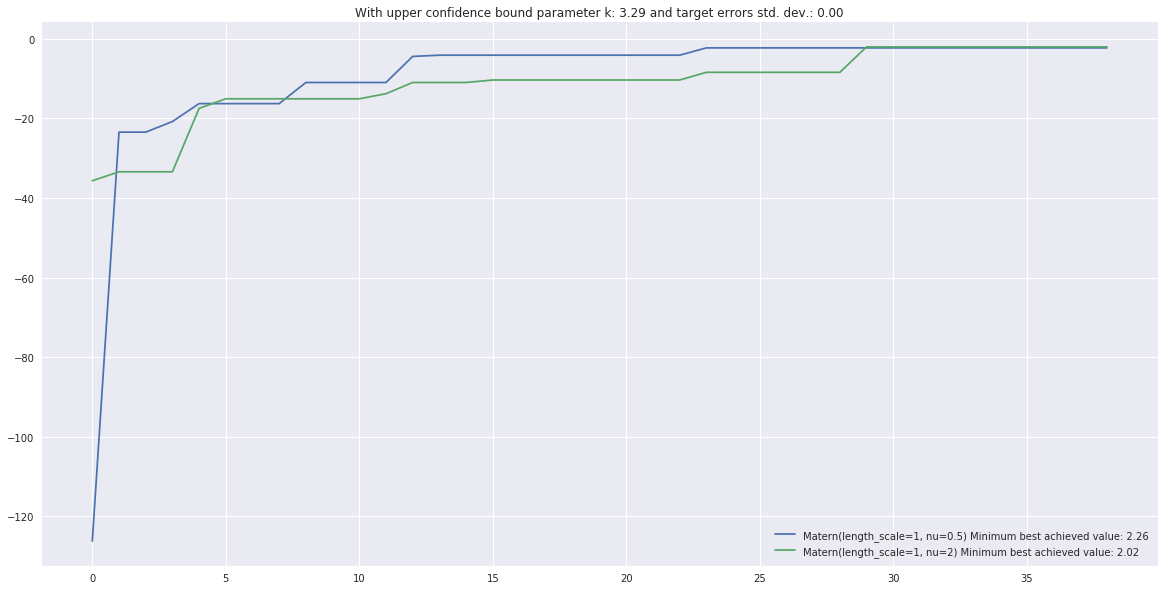

Best achieved in this run: 0.8457881847709727
Best achieved in this run: 0.47746941829617157
Best achieved in this run: 0.2769621772573857
Best achieved in this run: 0.486225927088972
Best achieved in this run: 0.812829797795658
Best achieved in this run: 0.7527736691398396
Best achieved in this run: 1.2039349406485105
Best achieved in this run: 1.713817954169238
Best achieved in this run: 0.7631975058460035
Best achieved in this run: 0.49354076122681356
Best achieved in this run: 3.6392289651220775
Best achieved in this run: 0.44387302193201117
Best achieved in this run: 0.6137286391769797
Best achieved in this run: 0.9991174573102638
Best achieved in this run: 1.543193445710986
Best achieved in this run: 2.563739058664362
Best achieved in this run: 1.646733251814277
Best achieved in this run: 2.2279947009420176
Best achieved in this run: 1.9635555996569938
Best achieved in this run: 2.1636398549257865


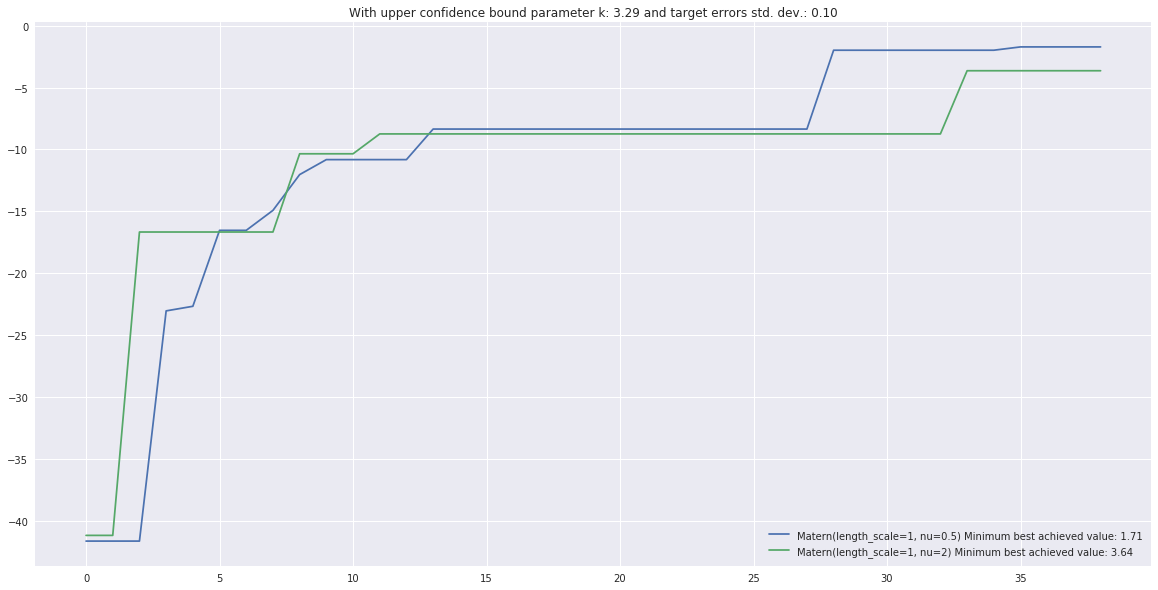

In [12]:
for k in [3.291]:
    for e in [.0001, .1]:
        results = []
        for i, kernel in enumerate([Matern(nu=.5), Matern(nu=2)]):
            all_scores = []
            for r in range(10):
                ro = RangeOptimizer({
                    'x1': (-5., 10.),
                    'x2': (0., 15.)
                }, kernel=kernel, init_observations=[
                    [1, 2, brannin_hoo(np.array([1, 2]), e_std=0.1)],
                    [1, 2, brannin_hoo(np.array([0, 0]), e_std=0.1)]
                ], acquisition_params={
                    'k': k,
                    'type': 'upper_confidence_bound'
                })
                for t in range(40):
                    x = ro.suggest(return_dict=True)
                    y = - brannin_hoo([x['x1'], x['x2']], e_std=e) # negative to turn mimization into maximization
                    ro.update([x[fn] for fn in ro.feature_names], y)
                    
                print('Best achieved in this run: {}'.format(-ro.best_achieved[-1]))
                all_scores.append(ro.best_achieved)
                
            avg_scores = np.stack(all_scores, axis=1).min(axis=1)
            results.append((avg_scores,str(kernel)))

        plt.figure(figsize=(20,10))
        for i, r in enumerate(results):
            plt.plot(r[0][1:], label='{} Minimum best achieved value: {:.2f}'.format(r[1], -np.max(r[0][1:])))

        plt.title('With upper confidence bound parameter k: {:.2f} and target errors std. dev.: {:.2f}'.format(k, e))
        plt.legend(loc=4)
        plt.show()

In [2]:
for k in [3.291]:
    for e in [.0001, .1]:
        results = []
        for i, kernel in enumerate([Matern(nu=.5), Matern(nu=2.), RBF(), RationalQuadratic()]):
            all_scores = []
            for r in range(10):
                ro = RangeOptimizer({
                    'x1': (-5., 10.),
                    'x2': (0., 15.)
                }, kernel=kernel, init_observations=[
                    [1, 2, brannin_hoo(np.array([1, 2]), e_std=0.1)],
                    [1, 2, brannin_hoo(np.array([0, 0]), e_std=0.1)]
                ], acquisition_params={
                    'k': k,
                    'type': 'upper_confidence_bound'
                })
                for t in range(100):
                    x = ro.suggest(return_dict=True)
                    y = - brannin_hoo([x['x1'], x['x2']], e_std=e) # negative to turn mimization into maximization
                    ro.update([x[fn] for fn in ro.feature_names], y)
                    
                print('Best achieved in this run: {}'.format(-ro.best_achieved[-1]))
                all_scores.append(ro.best_achieved)
                
            avg_scores = np.stack(all_scores, axis=1).min(axis=1)
            results.append((avg_scores,str(kernel)))

        plt.figure(figsize=(20,10))
        for i, r in enumerate(results):
            plt.plot(r[0][1:], label='{} Minimum best achieved value: {:.2f}'.format(r[1], -np.max(r[0][1:])))

        plt.title('With upper confidence bound parameter k: {:.2f} and target errors std. dev.: {:.2f}'.format(k, e))
        plt.legend(loc=4)
        plt.show()

NameError: name 'Matern' is not defined